# EMATM0048: Software Development Programming and Algorithms (SDPA)
# `Part 2: Data Analytics`


**Step 1: Crawl a real-world dataset**

This dataset about the passengers of Titanic cruise ship which comes from the Kaggle(a website of a data science community) as a training dataset has 1309 rows and 28 columns. I scraped it from the Kaggle website through my Kaggle API. The sinking of the Titanic is one of the most tragic maritime disasters in history. The Titanic sank on April 15, 1912, after colliding with an iceberg on its maiden voyage, killing 1,502 of its 2,224 passengers and crew. The set includes some essential variables about some pasengers of Titanic like their age, tickets' fare, sex, whether they are survived and so on. Below is a list of variables.

**Columns of the dataset:**

**Passengerid**: A unique identifier assigned to each passenger in the dataset. It is only for reference and indexing and do not participate in data analysis.

**Age**: The age of the passengers .

**Fare**: The price the passenger paid for their ticket.

**Sex**: The gender of the passenger, represented as 0 for male and 1 for female.

**SibSp** (Siblings/Spouses): The number of siblings or spouses the passenger had on the ship.

**Parch** (Parents/Children): The number of parents or children the passenger had on the ship.

**Pclass** (Passenger Class): The class of passengers, represented as 1 for First Class (upper class), 2 for Second Class (middle class) and 3 for Third Class (lower class).

**Embarked**: The port where the passenger boarded the Titanic, represented 0 for Southampton, 1 for Cherbourg and 2 for Queenstown.

**2urvived**(likely a typo for "Survived"): Indicates whether the passenger survived in the disaster, 0 for did not survived and 1 for Survived. This is the target variable.

**zero**: Meaningless columns need to be delected.

Now, let's crawl the dataset from Kaggle.

In [4]:
!pip install requests
!pip install kaggle

In [7]:
# Import some libraries
import requests
import pandas as pd
import json
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_USERNAME'] = 'yibaitang'# My Kaggle username
os.environ['KAGGLE_KEY'] = '6b0488aa880426c1c58d2e7133996bc9'# My Kaggle API

# Authenticate and initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the Titanic dataset from the website
api.dataset_download_files('heptapod/titanic', path='.', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic


**Step 2: Perform data preparation & cleaning**

Firstly, we load the dataset into a data frame using Pandas, and use "pandas.read_table" to show the frame of the dataset. We can find that the dataset has 1309 rows and 28 columns which included the information of 1309 passengers.

In [10]:
#Load the dataset into a data frame using Pandas
df = pd.read_csv('train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


Before operation, we can create a new data frame "survey_df" and duplicate the data from the original set to avoid the data changing.

In [13]:
# Duplicate the data frome the original dataset to a new set survey_df so that the original data will not be affected by the later operation
survey_df = df.copy()

Let's view the list of columns in the data frame.

In [16]:
survey_df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

We can see there are 28 columns in total, even some of them are meaningless. Then let's view some basic information of this frame.

In [19]:
survey_df.info

<bound method DataFrame.info of       Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
0               1  22.0    7.2500    0      1     0       0       0       0   
1               2  38.0   71.2833    1      1     0       0       0       0   
2               3  26.0    7.9250    1      0     0       0       0       0   
3               4  35.0   53.1000    1      1     0       0       0       0   
4               5  35.0    8.0500    0      0     0       0       0       0   
...           ...   ...       ...  ...    ...   ...     ...     ...     ...   
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  

For this part, we will handle the missing data. Firstly, we can check whether in each column has missing value, and calculate the quality of missing value of each column. In order to check the total amount of missing value we can just sum the number of missing value in each column.

In [22]:
# Check whether each column has missing value
print("checking missing value:")
print(survey_df.isnull().any())

# Sum the missing value of each column
print("missing data for each column:")
print(survey_df.isnull().sum())

# Sum the total missing value
print("total amount of missing value:")
print(survey_df.isnull().sum().sum())

checking missing value:
Passengerid    False
Age            False
Fare           False
Sex            False
sibsp          False
zero           False
zero.1         False
zero.2         False
zero.3         False
zero.4         False
zero.5         False
zero.6         False
Parch          False
zero.7         False
zero.8         False
zero.9         False
zero.10        False
zero.11        False
zero.12        False
zero.13        False
zero.14        False
Pclass         False
zero.15        False
zero.16        False
Embarked        True
zero.17        False
zero.18        False
2urvived       False
dtype: bool
missing data for each column:
Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
Parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.1

We can find that the only 2 missing values are all from the Embarked column. Since it is a qualitative variable, we can just change them into the mode value of 'embarked'. After that we check the total amount of missing value again to garanteen that all missing value were handled out.

In [25]:
#Use the mode of 'embarked' to fill the blanks. 
mode_value_Embarked = survey_df['Embarked'].mode()[0]
print("The mode of 'Embarked' is:", mode_value_Embarked)# Compute the mode.
# Take place the missing value with mode.
survey_df['Embarked'] = survey_df['Embarked'].fillna(mode_value_Embarked)

#Check whether all missing value was handled out.
total_missing = survey_df.isnull().sum().sum()
if total_missing == 0:
    print('All missing data has been handled!')
else:
    print('There is still some missing value.')
    

The mode of 'Embarked' is: 2.0
All missing data has been handled!


To handle any outliers or inconsistencies in the data. We can preliminarily use '.describe' to check the maximum and minimum of each column and find the obvious outliers. 

In [28]:
survey_df.describe(include= 'all')

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.493506,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814244,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


From the age column, we can find the oldest passenger is 80 and the youngest is 0.17(may be an infant) which are all acceptable. For the fare column we can notice that the most expensive ticket cost more than 500 pounds, whereas some people joined the cruise for free. For the sibsp and Parch column has maximum 8 and 9 respectively, which are obvious outlier. They can be handled in the later process. Before that we can check whether there are some errors in the qualitative data like 'sex', 'Pclass' and 'embarked' by counting the number of each classification.  

In [31]:
# check mistakes in Sex
survey_df['Sex'].value_counts()

Sex
0    843
1    466
Name: count, dtype: int64

In [33]:
# check mistakes in Pclass
survey_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [35]:
# check mistakes in Embarked
survey_df['Embarked'].value_counts()

Embarked
2.0    916
0.0    270
1.0    123
Name: count, dtype: int64

We can find all value of sex, Pclass and embarked are acceptable. In the next step, we can draw some boxplots to find the distribution of some qualitative variables. Boxplots can clearly show the 25%, 75% and mean value of each column and the potential outliers can be distinctly displayed. 

{'whiskers': [<matplotlib.lines.Line2D at 0x24d76fc6810>,
 'caps': [<matplotlib.lines.Line2D at 0x24d76fc6e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d76fc64e0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d76fc73e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d76fc76e0>],
 'means': []}

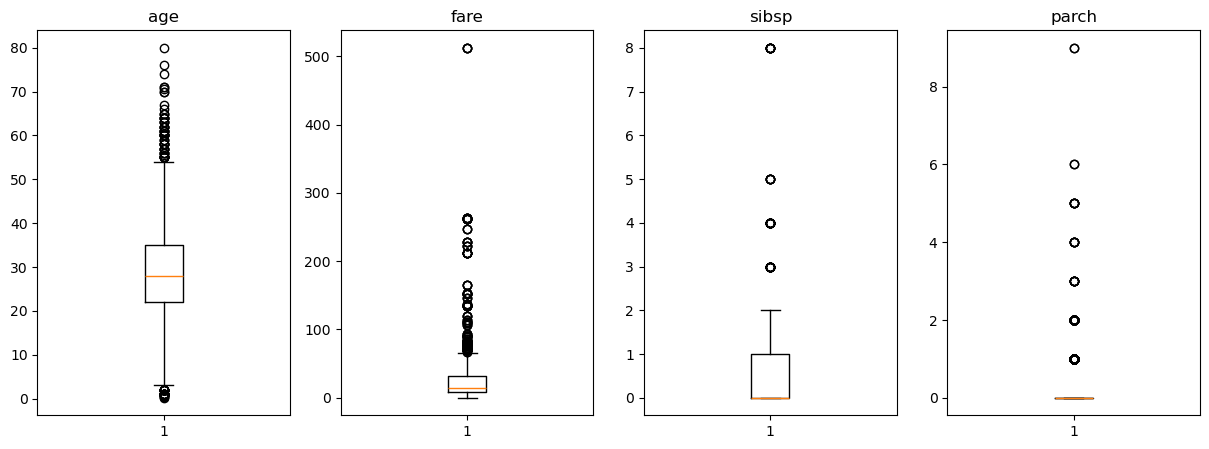

In [38]:
#box-plots
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,5))
#box-plot for age
ax0.set_title('age')
ax0.boxplot(survey_df['Age'])
#box-plot for fare
ax1.set_title('fare')
ax1.boxplot(survey_df['Fare'])
#box-plot for sibsp
ax2.set_title('sibsp')
ax2.boxplot(survey_df['sibsp'])
#box-plot for parch
ax3.set_title('parch')
ax3.boxplot(survey_df['Parch'])

For the age plot we can see that there are some value outside the bound of 25%-75%, but the distribution is relatively uniform, so we choose to ignore the outliers of age. However, the other three plots have distinct outliers which need be handled. To find the values of fare, sibsp and porch that are considered as outliers, we can use 3-sigma rule to mark an outlier any observation outside 3 sd. 

In [41]:
# Filter the outliers of fare
x= survey_df['Fare']
xhigherBound= x.mean() + 3 * x.std()# Identify the higherbound
xlowerBound= x.mean() - 3 * x.std()# Identify the lowerbound
print (xhigherBound, xlowerBound)
# Set condition to filter the value outside the bounds 
xcond1= survey_df['Fare']<xhigherBound
xcond2= survey_df['Fare']>xlowerBound

# Filter the outliers of sibsp
y= survey_df['sibsp']
yhigherBound= y.mean() + 3 * y.std()
ylowerBound= y.mean() - 3 * y.std()
print (yhigherBound, ylowerBound)
ycond1= survey_df['sibsp']<yhigherBound 
ycond2= survey_df['sibsp']>ylowerBound

# Filter the outliers of parch
z= survey_df['Parch']
zhigherBound= z.mean() + 3 * z.std()
zlowerBound= z.mean() - 3 * z.std()
print (zhigherBound, zlowerBound)
zcond1= survey_df['Parch']<zhigherBound 
zcond2= survey_df['Parch']>zlowerBound

# Show the filtered data frame 
filtered_survey_df = survey_df[xcond1 & xcond2 & ycond1 & ycond2 & zcond1 & zcond2] 
filtered_survey_df

188.50558494046973 -121.94341366468669
3.623829258877674 -2.626121084698912
2.9817075640164523 -2.211654088080623


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


We can see the filtered data frame have less rows which means some outliers already be filtered.

In this part, we need to perform any additional steps to enrich our data. We already bothered by the meaningless zero colums for a long time so we can cancel them now. Just traverse each columns and drop off which name start with 'zero'.

In [45]:
# Delecting the meaningless zero columns
for col in survey_df.columns:
    if col.startswith('zero'):
        survey_df = survey_df.drop(columns=[col])
        
survey_df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


The other obvious mistake is '2urvived', it may caused by a typing error. Let's correct it as 'Survived'.

In [48]:
#Set the correct column names
survey_df = survey_df.rename(columns={'2urvived': 'Survived'})
survey_df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


Since age is a continuous variable, we need to change it into categorical variable so that it can be handled easily. In the above steps we already find that the maximum of age is 80. Let's devide the age range from 0 to 80 into 5 bins with size 16.

In [51]:
#Categorize the age into 5 bins
survey_df['Age_band'] = pd.cut(survey_df['Age'], bins=[0, 16, 32, 54, 80], labels=['Child', 'Youngster', 'Middle-age', 'Elder'])
survey_df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Age_band
0,1,22.0,7.2500,0,1,0,3,2.0,0,Youngster
1,2,38.0,71.2833,1,1,0,1,0.0,1,Middle-age
2,3,26.0,7.9250,1,0,0,3,2.0,1,Youngster
3,4,35.0,53.1000,1,1,0,1,2.0,1,Middle-age
4,5,35.0,8.0500,0,0,0,3,2.0,0,Middle-age
...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0,Youngster
1305,1306,39.0,108.9000,1,0,0,1,0.0,0,Middle-age
1306,1307,38.5,7.2500,0,0,0,3,2.0,0,Middle-age
1307,1308,28.0,8.0500,0,0,0,3,2.0,0,Youngster


**Step 3: Perform exploratory analysis**

To explore our data, we firstly need to compute the mean, sum, range, and other interesting statistics for numeric columns. We can directly use '.describe' to show some statistical value of each column which includs the number count, mean, maximum, minimum, standard deviation, threshold of 25%, 50% and 75%, etc.

In [54]:
survey_df.describe(include='all')

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Age_band
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youngster
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,787
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.493506,0.261268,NaN
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814244,0.439494,NaN
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,NaN
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,NaN
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,NaN


Now we can create some diagrams to illustrate some data features. To explore distributions of numeric columns, we firstly use histograms. Histograms can straightforward show the number count of each ranges of value. We give the example for age, fare, sibsp and parch.

(array([1002.,  170.,  113.,    8.,    6.,    6.,    2.,    0.,    0.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

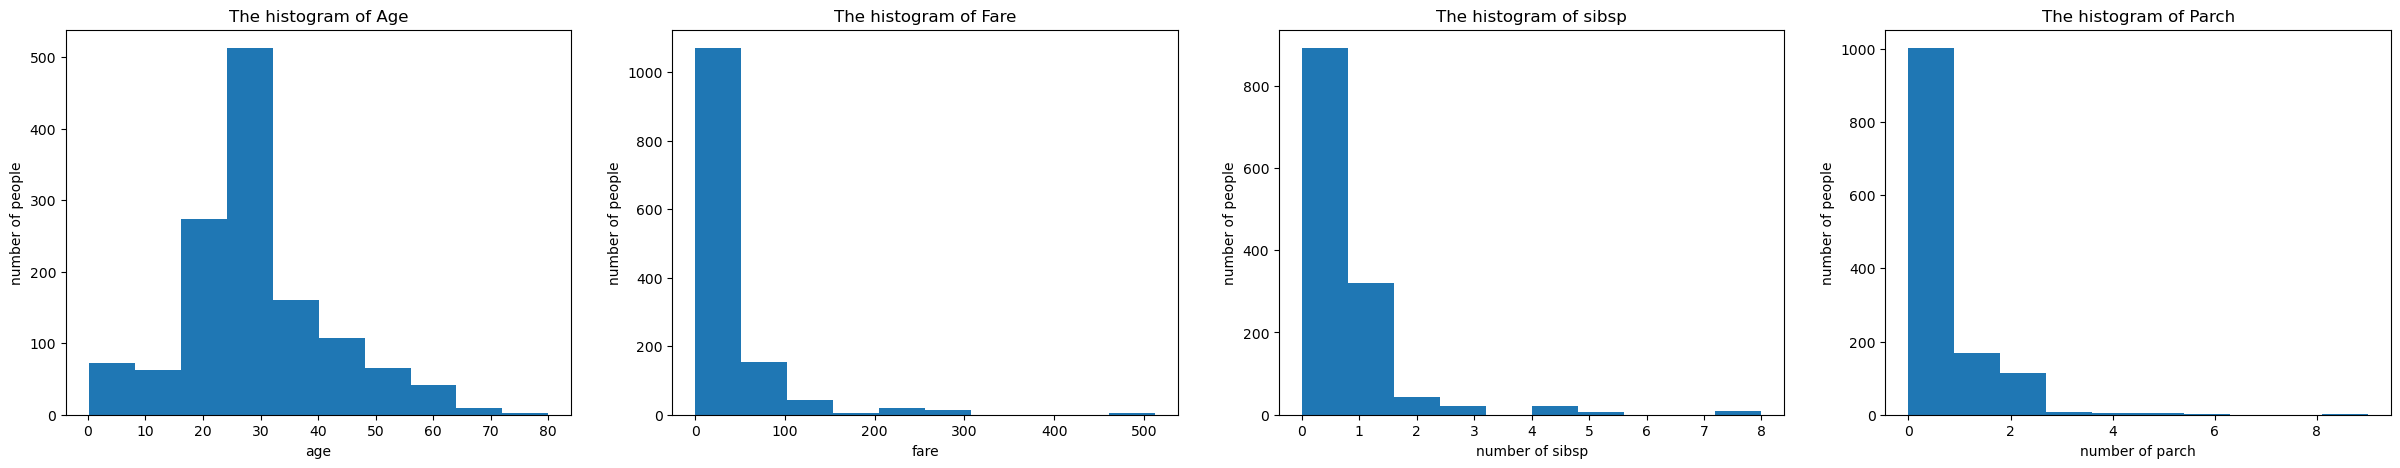

In [57]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(30,5))#Create 4 subplots

# Histogram for age
ax0.set_title('The histogram of Age')#set the title of the digram
ax0.set_xlabel('age')#set the name of x label
ax0.set_ylabel('number of people')#set the name of y label
ax0.hist(survey_df['Age'])#Use the value of age column to create the histogram

# Histogram for fare
ax1.set_title('The histogram of Fare')
ax1.set_xlabel('fare')
ax1.set_ylabel('number of people')
ax1.hist(survey_df['Fare'])

# Histogram for sibsp
ax2.set_title('The histogram of sibsp')
ax2.set_xlabel('number of sibsp')
ax2.set_ylabel('number of people')
ax2.hist(survey_df['sibsp'])

# Histogram for parch
ax3.set_title('The histogram of Parch')
ax3.set_xlabel('number of parch')
ax3.set_ylabel('number of people')
ax3.hist(survey_df['Parch'])

In the first diagram we can find the range have most people is 25-35 and the second most range is 15-25, which means the majority of passengers are youngster. The number of people decreases as age increases, and there also some kids under 15 on this ship. 

In the second digram we can notice that despite someone spend more than 500 for the ticket, most people spent less than 100 pounds for this cruise. 

In the third and forth diagram we can find most people only have no more than 3 siblings and spouse or parants and children. Which means most people may take this cruise alone or just with one family member.

For some qualitative variables we can use pie chart to show the percentage of each categorization, and countplot can straightforward show the quantity of each categorization. We give the example of the sex, embarked and survival of passengers.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6364\4064816376.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Male', 'Female'])  # Set custom labels for x-axis


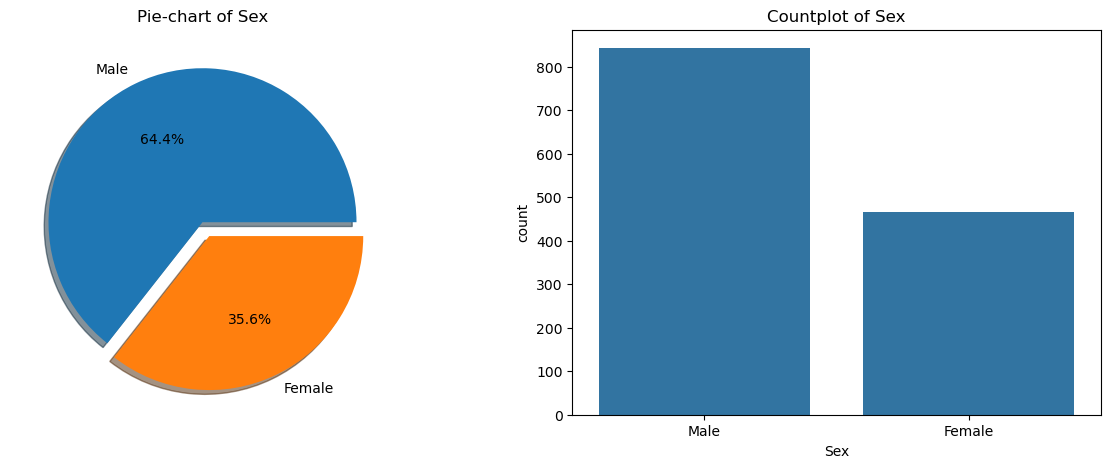

In [60]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for sex distribution
survey_df['Sex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax0, shadow=True, labels=['Male', 'Female'])
ax0.set_title('Pie-chart of Sex')
ax0.set_ylabel('')

# Count plot for sex distribution
sns.countplot(data=survey_df, x="Sex", ax=ax1)
ax1.set_title('Countplot of Sex')
ax1.set_xticklabels(['Male', 'Female'])  # Set custom labels for x-axis

plt.show()

In above diagrams we can find the male passenger is more than the female.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6364\31116458.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])


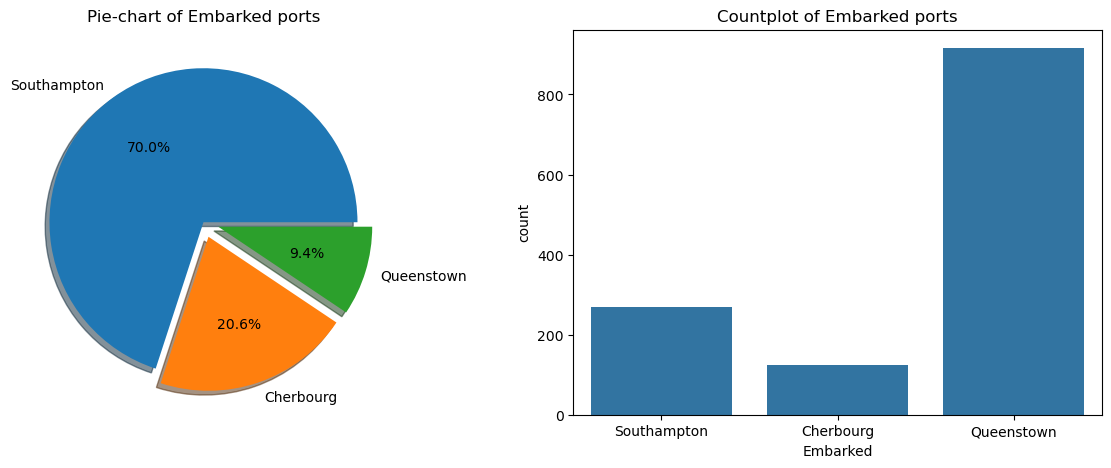

In [64]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for embarked ports distribution
survey_df['Embarked'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=ax0, shadow=True, labels=['Southampton', 'Cherbourg', 'Queenstown'])
ax0.set_title('Pie-chart of Embarked ports')
ax0.set_ylabel('')

# Count plot for embarked ports distribution
sns.countplot(data=survey_df, x="Embarked", ax=ax1)
ax1.set_title('Countplot of Embarked ports')
ax1.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

plt.show()

In above diagrams we can find the majority of people embarked from the Southampton port and the second port is Cherbourg, whereas the least passengers from the Queenstown.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6364\308181672.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['unsurvived', 'survived'])


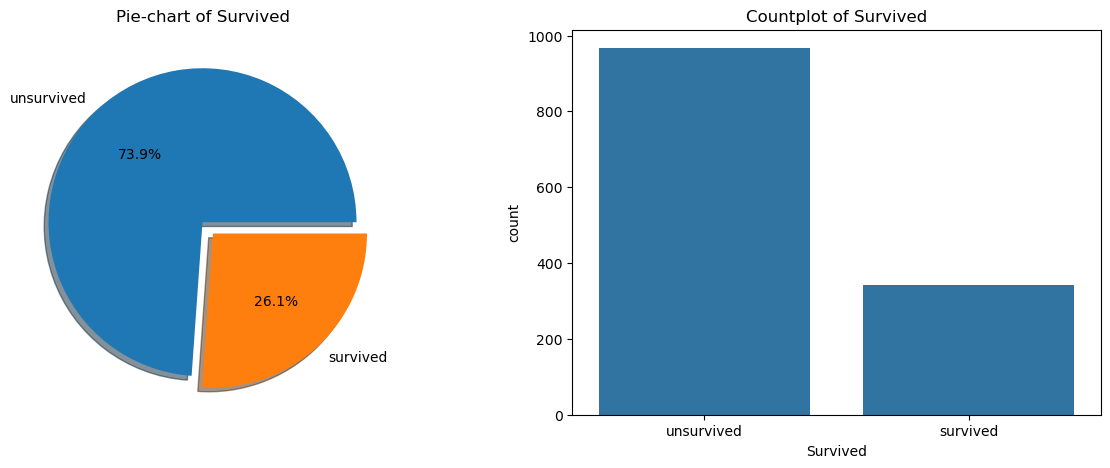

In [67]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for survival distribution
survey_df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax0, shadow=True, labels=['unsurvived', 'survived'])
ax0.set_title('Pie-chart of Survived')
ax0.set_ylabel('')

# Count plot for survival distribution
sns.countplot(data=survey_df, x="Survived", ax=ax1)
ax1.set_title('Countplot of Survived')
ax1.set_xticklabels(['unsurvived', 'survived']) 

plt.show()

In above diagrams we can find most people were killed by the disaster, and only about a quarter were saved.

To explore the relationship between columns, we firstly use scatter plots to demostrate the relationship of 3 column-pairs: age-fare, sibsp-parch and age-parch. In order to see the effect of Sex we can divide the data frame into 2 sub data frames for 2 genders and use different colors to distinguish them.

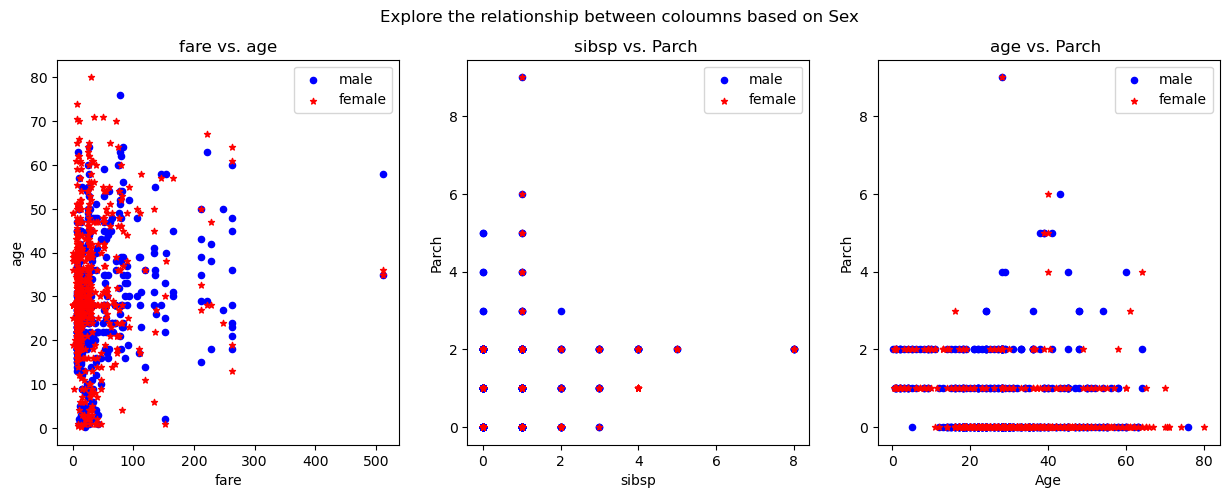

In [71]:
#Divide the data frame into 2 part for male and female
male_survey_df = survey_df[survey_df['Sex']==1]
female_survey_df = survey_df[survey_df['Sex']==0]

#Create figure and get the axes
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
#Add title for entire figure
fig.suptitle("Explore the relationship between coloumns based on Sex")

#plot fare vs. age for male
male_survey_df.plot(kind="scatter", x='Fare', y='Age', color='blue', label='male', marker='o', ax=ax0)
#plot fare vs. age for female
female_survey_df.plot(kind="scatter", x='Fare', y='Age', color='red', label='female', marker='*', ax=ax0)
#set the title for the first subplot and name the labels
ax0.set(title = "fare vs. age", xlabel="fare", ylabel="age")
ax0.legend()

#plot sibsp vs. parch
male_survey_df.plot(kind="scatter", x='sibsp', y='Parch', color='blue', label='male', marker='o', ax=ax1)
female_survey_df.plot(kind="scatter", x='sibsp', y='Parch', color='red', label='female', marker='*', ax=ax1)
ax1.set(title = "sibsp vs. Parch ", xlabel="sibsp", ylabel="Parch")
ax1.legend()

#plot age vs. parch
male_survey_df.plot(kind="scatter", x='Age', y='Parch', color='blue',label='male', marker='o', ax=ax2)
female_survey_df.plot(kind="scatter", x='Age', y='Parch', color='red', label='female', marker='*', ax=ax2)
ax2.set(title = "age vs. Parch ", xlabel="Age", ylabel="Parch")
ax2.legend()

In the first diagram of above we can find there maybe no significant relationship between the fare and age. However, we can notice that more male passengers spend more than 100 ponds for the cruise than female. 



In the second diagram we can find that sibsp and parch arnot strongly correlatedal, people have less siblings or spouses may havmoress parents and children on this ship, vice versaMeanwhile, there is a few passengers with more than 4 sibsp or parch on the ship.. 

In the last diagram we can find there maybe no significant relationship between age and parchmaybe the youngsters and middle-age have more parch on this ship. , whereas male passengers seems have more parents and children on this ship than female. The majority of passengers who have more than 2 parents and children on the ship is male. 

Then we use countplots to investigate the relationship between sex with survival, pclass with survival and age_band with survival.

Text(0.5, 1.0, 'Age_band vs. survival')

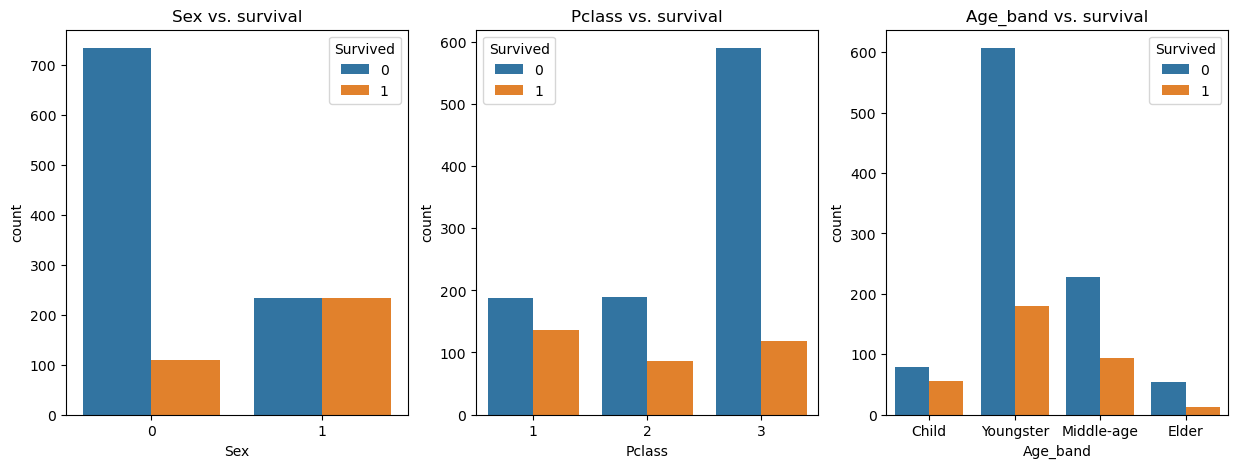

In [75]:
fig,(ax0, ax1, ax2)=plt.subplots(1,3,figsize=(15,5))

#countplot for survived vs. sex
sns.countplot(x='Sex',hue='Survived',data=survey_df,ax=ax0)
ax0.set_title('Sex vs. survival')

#countplot for pclass vs. survived
sns.countplot(x= 'Pclass',hue='Survived',data=survey_df,ax=ax1)
ax1.set_title('Pclass vs. survival')

#countplot for age_band vs. survived
sns.countplot(x= 'Age_band',hue='Survived',data=survey_df,ax=ax2)
ax2.set_title('Age_band vs. survival')


The first diagram above shows that more men than women died in the disaster, that the number of male passengers who survived was small and most of them died, while the number of female passengers who survived was close to or even slightly higher than the number who did not. 

The second diagram shows that cabin class significantly affects survival rates. Survival rates were higher in first class, with the number of survivors approaching or even exceeding the number of deaths. The second group had a smaller gap between survival and death, but slightly more deaths. Third class had the lowest survival rates, with far more deaths than survivors. 

The third diagram shows that age has some effect on survival. The number of survived children is similar to the number of deaths, and the survival rate is higher. The gap between survival and deathThe of young people, middle-age and elder illustrated that their number of death is significantly higher than the number of survivors. In addition, almost all the elders died, only a few survived.

Then we use crosstab to show the relationship among 3 coloumns: sex, pclass and survived.

In [79]:
pd.crosstab([survey_df.Sex,survey_df.Survived],survey_df.Pclass,margins=True)

Pclass          1    2    3   All
Sex Survived                     
0   0         134  154  446   734
    1          45   17   47   109
1   0          53   36  144   233
    1          91   70   72   233
All           323  277  709  1309

This table clearly shows that there are strong relationship between pclass and sex with survived. More male passengers were died and just a few survived. Oppositely, most female passengers survived. Additionally, There was a positive correlation between pclass and number of survival, the cabin class higher, the survival rate higher.

Then we use violin plots to investigate the relationship among 3 columns: Pclass and Age vs. Survived and Sex and Age vs. Survived.

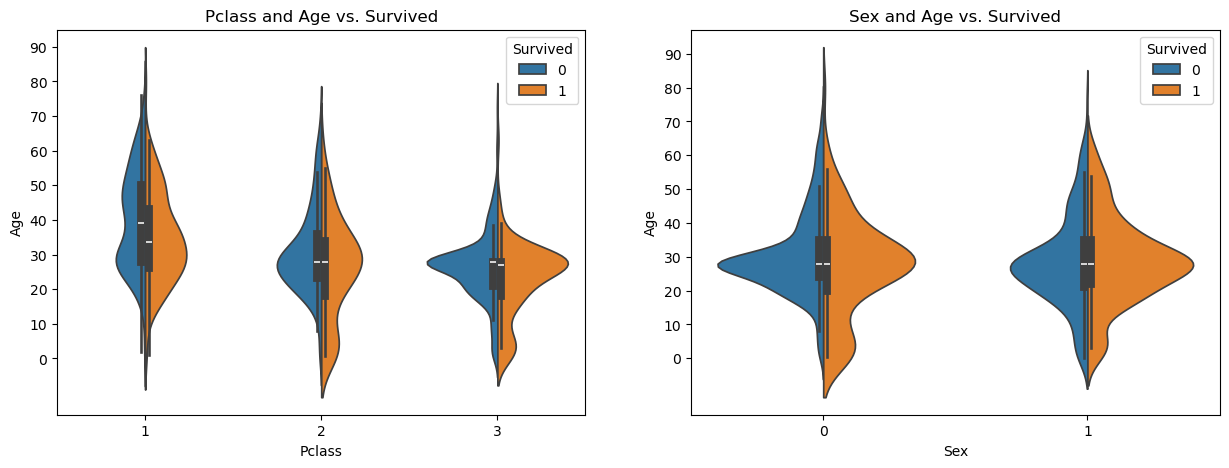

In [83]:
fig,(ax0, ax1)=plt.subplots(1,2,figsize=(15,5))

#violin plot for Pclass and Age vs. Survived
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=survey_df, split=True, ax=ax0)
ax0.set_title('Pclass and Age vs. Survived')
ax0.set_yticks(range(0,100,10))

#violin plot for Sex and Age vs. Survived
sns.violinplot(x="Sex", y="Age", hue="Survived", data=survey_df,split=True, ax=ax1)
ax1.set_title('Sex and Age vs. Survived')
ax1.set_yticks(range(0,100,10))
plt.show()

The first diagram shows the effect of pclass and age on survival. Different cabin classes may correspond to different survival rates. In general, first-class passengers have a higher survival rate than second and third. Age may also be an important factor. For example, children and the elderly may have different survival rates.

The second diagram shows the effects of Sex and Age on survival. Gender is an important influencing factor, women  tend to have a higher survival rate than men in the Titanic disaster. Similarly, age may also have an effect on survival. Young women and children may be more likely to survived.

**Step 4: Ask question about your data**

Question: How to construct a model based on the data to estimate the survival rate of each person?

Ans: Since we have many characteristic variable which related to the target variable survival, we can choose the logistic regression. The following is a complete implementation of using logistic regression to predict the survival probability of Titanic passengers. First, we need to import some necessary libraries like sklearn.

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, roc_auc_score

To fit the model, we use the filtered survey data frame which we obtained after handling outliers process in step 2. We can operate the filtered data frame in the same way by delecting the zero-columns and modify the column name.

In [92]:
#delect zero-coloumns
for col in filtered_survey_df.columns:
    if col.startswith('zero'):
        filtered_survey_df = filtered_survey_df.drop(columns=[col])
#change the column name
filtered_survey_df = filtered_survey_df.rename(columns={'2urvived': 'Survived'})
filtered_survey_df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0
...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0
1305,1306,39.0,108.9000,1,0,0,1,0.0,0
1306,1307,38.5,7.2500,0,0,0,3,2.0,0
1307,1308,28.0,8.0500,0,0,0,3,2.0,0


The next step is to divided the data frame into 2 sets. For each set we need to extract some necessary features as arguments(input) for the characteristic variables subset X, we consider the columns of age, pclass, fare, sex, sibsp and parch. And y is the subset for extraction of target variables, here is survived. After that we divide the data into training sets and test sets to train the model and evaluate performance, we specify the proportion of the test set to the total data set is 1/3 and set random seeds so that the results are reproducible (to make sure the same training set and test set are split each run).


In [95]:
#Extract the data feature and target variable
X = filtered_survey_df[['Pclass', 'Age', 'sibsp', 'Parch', 'Fare', 'Sex']]
y = filtered_survey_df['Survived']

# Divide the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In this step we create and train logistic regression models and Use the model to predict survival probabilities. We create a classification model using LogisticRegression and specify the maximum number of iterations is 1300 to ensure that the model converges on complex data sets (to avoid situations where default 100 iterations are not enough). After that we train the model using training sets (X_train and y_train) to learn the relationship between features and whether passengers survived.

In [114]:
# Create and train logistic regression models
model = LogisticRegression(max_iter=1300)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1300)

In this step we use the obtained model to predict the survival rate of each passenger in the original dataset and add the survival probability to the original table. The method 'predict_prob' can return the probability of each sample, and we extract column 1, which is survival probability for each passenger in the test set. After that we predict the survival rate for all set not only X, and add a new column 'Survival_Probability' which contains predicted survival probability of all passengers.

In [101]:
# Predict survival probability
y_pred_prob = model.predict_proba(X_test)[:, 1]
filtered_survey_df['Survival_Probability'] = model.predict_proba(X)[:, 1] # add a new column 'Survival_Probability'
filtered_survey_df

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived,Survival_Probability
0,1,22.0,7.2500,0,1,0,3,2.0,0,0.088601
1,2,38.0,71.2833,1,1,0,1,0.0,1,0.680148
2,3,26.0,7.9250,1,0,0,3,2.0,1,0.402213
3,4,35.0,53.1000,1,1,0,1,2.0,1,0.667973
4,5,35.0,8.0500,0,0,0,3,2.0,0,0.076766
...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,3,2.0,0,0.091450
1305,1306,39.0,108.9000,1,0,0,1,0.0,0,0.769185
1306,1307,38.5,7.2500,0,0,0,3,2.0,0,0.069870
1307,1308,28.0,8.0500,0,0,0,3,2.0,0,0.091450


After obtaining the predicted survival rate of each person, we can apply some methods to test the quality of the logistic regression model. 

The first is Mean Squared Error(MSE), which used to calculate the mean square error between the actual value and the predicted value. MSE measures the difference between the model's predicted value and the true value, the smaller the value is, the closer the model prediction is to the true value.

The second is ROC AUC score to compute the value of ROC-AUC (Receiver Operating Characteristic - Area Under Curve)，which used to evaluate the performance of classification models. The ideal case is AUC = 1.0 which indicate a perfect classification of the model. If random classification: AUC = 0.5, it indicate that the model has no predictive ability.

In [104]:
# compute the MSE
mse = mean_squared_error(y_test, y_pred_prob)
print(f"Mean Squared Error: {mse:.2f}")

# compute the roc_auc score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc:.2f}')

Mean Squared Error: 0.15
ROC-AUC Score: 0.78


The mean square error of this model is 0.15 indicates that the error between the predicted survival probability and the true label is small. It shows that the prediction of survival probability is relatively accurate. However, MSE can only tell us whether the probability predicted by the model is close to the true value, and can not directly reflect the classification ability.

The ROC-AUC score is 0.78 shows that the classification performance of the model is good, which indicates that the model has an 78% probability of correctly placing the probability of survivor before the probability of non-survivor when randomly selecting a survivor and an unsurvivor. Actually, AUC > 0.8 is generally considered a strong classification model.

The last step we create a histogram for the predicted survival rate to show the frequency of each survival probability ranges from 0 to 1.

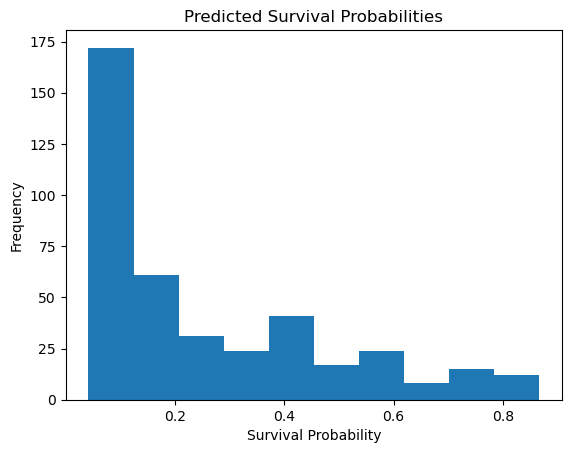

In [108]:
plt.hist(y_pred_prob)
plt.title('Predicted Survival Probabilities')
plt.xlabel('Survival Probability')
plt.ylabel('Frequency')
plt.show()

We can observe that most people's survival probability are gathered below 0.5, which can match the real data that most of passengers were killed in that disaster.

**Step 5: Summarise and write a conclusion**

For the data of Titanic passengers, I have some obervations:
1. Age has a strong relationship with survival. In our investigation we can find the portion of survived children and youngster is much higher than the elder and mid-age. We can image that most elder people on the ship gave their own chances to live to the younger people.
2. Sex is another variable which has strong relationship with servival. The percentage of male survivor is lower than the female, it can really match the protocal of the captain: "women and children first".
3. For the carbin class, passengers with higher class had the higher survival rates, maybe the extrance and saving equipment are prioritized to the higher class passengers.
4. Fare showed a positive correlation with survival probability, likely reflecting the higher survival chances of wealthier passengers.
5. There are some other unimpressive relationship, like people have less siblings or spouses may have less parents and children on this ship and so on.

In this project, I have learned many useful and necessary skills of data analysis:

1. Use API to crawl a external dataset from a website.
2. Find and handling the missing data in a dataset. Even in this dataset there are only 2 missing value and they are better to use mode to fill, there are also other method of missing data handling I can choose for other condition.
3. Use boxplot to find the outliers and use 3-sigma method to filter the data with bound condition.
4. To optimize the data, I can add or delect some columns if necessary.
5. Use some diagrams like histogram, pie-chart to show the distribution of each variable directly.
6. Use scatter plot, crosstab, violin plot to investigate the relationship between different variables.
7. Fitting logistic regression model to predict the target value through characteristic variable, and use MSE and AUC to measure the quality of model.

For future work:
1. We can obtain more information about the passengers like the name, job, number of acquaintances with the crew on ship, etc. Maybe some ignored variable have more strong relationship with the survival condition.
2. Explore the external condition like the rescue method after disaster(maybe lady and children first), when the rescue start, the weather condition, etc. These condition may also have relationship with the survival.
3. We can use more modeling techniques like Random Forests, Gradient Boosting (XGBoost), or Neural Networks to potentially improve prediction accuracy.
4. Use time series analysis: use time series model to investigate the survival chances change on the timeline if we can find more related information.